In [1]:
import pandas as pd

dataset = pd.read_csv('glass.csv')

x= dataset.iloc[:,0:9].values #iloc: Getting values from column 0 to column 9
y= dataset.iloc[:,9].values #iloc: Getting values from column 9

print(x) #Printing glass.csv values
print("\n")
print(y) #Printing glass.csv values in 9 th column

[[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [2]:
from sklearn.model_selection import train_test_split

x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size=0.2)

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_Train, y_Train)

DecisionTreeClassifier()

In [4]:
train_score = tree.score(x_Train, y_Train)
test_score = tree.score(x_Test, y_Test)

print(round(train_score, 2))
print(round(test_score, 2))

1.0
0.67


In [5]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5,)
tree.fit(x_Train, y_Train)

train_score = tree.score(x_Train, y_Train)
test_score = tree.score(x_Test, y_Test)

print(round(train_score, 2))
print(round(test_score, 2))

0.74
0.7


The Visualization

In [6]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(x, y)

DecisionTreeClassifier(max_depth=2)

In [7]:
from sklearn.tree import export_graphviz #Using tree visualizer

export_graphviz(tree, out_file='Decision_Tree.dot', class_names=True, filled=True)
#out_file: Creating the Decision_Tree.dot file
#filled: Filling the corners

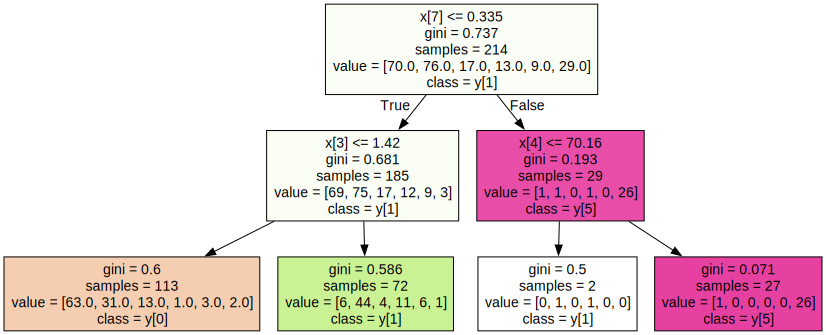

In [8]:
#Open Decision_Tree.dot file using graphviz and plot it
import graphviz

with open('Decision_Tree.dot') as f:
      dot_graph = f.read()
graphviz.Source(dot_graph)

In [9]:
from sklearn.metrics import accuracy_score

#Printing Accuracy
tree.fit(x_Train, y_Train)
accuracy = accuracy_score(y_Test, tree.predict(x_Test))
print("Accuracy:", round(accuracy, 2))

#Printing Max Accuracy
tree.fit(x_Train, y_Train)
train_accuracy = accuracy_score(y_Train, tree.predict(x_Train))
test_accuracy = accuracy_score(y_Test, tree.predict(x_Test))
max_accuracy = max(train_accuracy, test_accuracy)
print("Max Accuracy:", round(max_accuracy, 2))


Accuracy: 0.6
Max Accuracy: 0.63


In [10]:
#Printing Precision Score
from sklearn.metrics import precision_score

tree.fit(x_Train, y_Train)
precision = precision_score(y_Test, tree.predict(x_Test), average='macro')
print("Precision Score:", round(precision, 2))

Precision Score: 0.33


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
#Printing Recall Score
from sklearn.metrics import recall_score

tree.fit(x_Train, y_Train)
recall = recall_score(y_Test, tree.predict(x_Test), average="macro")
print("Recall Score:", round(recall, 2))

Recall Score: 0.38
